Importing modules

In [1]:
##loading module
import numpy as np
import pandas as pd
import cv2
#from keras.models import load_model
import keras.backend as k1
import time
from sklearn.model_selection import train_test_split
from skimage.io import imread,imshow
from skimage.transform import resize
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,GlobalAveragePooling2D,Convolution2D,AveragePooling2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121,DenseNet169

#from keras.applications.densenet import preprocess_input
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from glob import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2022-12-22 20:25:46.895308: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 20:25:47.828660: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hrithik/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-22 20:25:47.828735: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-22 20:25:47.991456: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already

Data read

In [2]:
path="augmented-image/"
l=glob(path+"*")
s=len(glob(path+"*"))
print(l)

['augmented-image/late-blight', 'augmented-image/early-blight', 'augmented-image/backkleg', 'augmented-image/septoria', 'augmented-image/safe']


Data Extraction

In [3]:
'''
Extract features from images '''
path="augmented-image/"
l=glob(path+"*")
s=len(glob(path+"*"))
extract=[]
name_items=[]
for i in l:
    name_items.append(i[16:])
print(name_items)

flat_data_arr=[] #input array
target_arr=[] #output array
for j in name_items:
    m=glob("./"+path+j+"/*")
    for h in m:
        s = cv2.imread(h, cv2.IMREAD_COLOR)       
        s = cv2.resize(s, (100,100))
        s= cv2.cvtColor(s, cv2.COLOR_RGB2BGR)
        extract.append([np.array(s),j])
print(len(extract))
ex=extract        



['late-blight', 'early-blight', 'backkleg', 'septoria', 'safe']
1608


In [5]:
import pandas as pd
data=pd.DataFrame(extract)
data.to_excel("data.xlsx")

Image showing

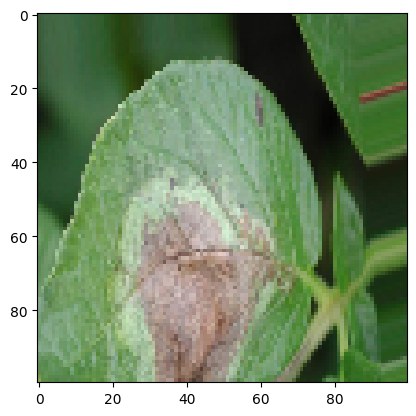

In [4]:
plt.imshow(extract[100][0])

Split features and classes

In [4]:
x=[]
y=[]
for features,class_value in extract:
    x.append(features)
    y.append(class_value)
x=np.array(x)
y=np.array(y)
x=x.reshape(x.shape[0],100,100,3)
print(x.shape)
y1=y

(1608, 100, 100, 3)


Make stationary 

In [5]:
x=x/255.0


Encoding

In [6]:
lb=LabelEncoder()
y=to_categorical(lb.fit_transform(y))
y


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

Starting the session

In [8]:
print(x.shape,y.shape)
k1.clear_session()

(1608, 100, 100, 3) (1608, 5)


Split into train and test

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [9]:
y_test.shape

(483, 5)

Multilayer-perception

In [8]:
#mlp
mlp_model=Sequential()
mlp_model.add(Flatten(input_shape=(100,100,3)))
mlp_model.add(Dense(256,activation="relu"))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(128,activation="relu"))
mlp_model.add(Dropout(0.2))

mlp_model.add(Dense(5,activation="softmax"))
mlp_model.summary()

2022-12-22 20:26:47.916321: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hrithik/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-22 20:26:47.916415: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-22 20:26:47.916475: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hrithik-Lenovo-ideapad-320-15ISK): /proc/driver/nvidia/version does not exist
2022-12-22 20:26:47.920053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 256)               7680256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 7,713,797
Trainable params: 7,713,797
Non-

2022-12-22 20:26:48.159389: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 30720000 exceeds 10% of free system memory.


_________________________________________________________________


Compiling

In [9]:
mlp_model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

training data 

In [10]:
start = time.time()
history=mlp_model.fit(x_train,y_train,epochs=10,batch_size=128,verbose=1,validation_data=(x_test, y_test))
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

2022-12-22 20:26:49.214807: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 135000000 exceeds 10% of free system memory.


Epoch 1/10


2022-12-22 20:26:50.128264: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 30720000 exceeds 10% of free system memory.


9/9 [==============================] - 4s 226ms/step - loss: 9.7665 - accuracy: 0.2596 - val_loss: 2.6301 - val_accuracy: 0.4720
Epoch 2/10
9/9 [==============================] - 1s 140ms/step - loss: 4.5003 - accuracy: 0.3191 - val_loss: 1.8270 - val_accuracy: 0.2588
Epoch 3/10
9/9 [==============================] - 1s 116ms/step - loss: 2.2078 - accuracy: 0.4036 - val_loss: 0.7776 - val_accuracy: 0.6687
Epoch 4/10
9/9 [==============================] - 1s 153ms/step - loss: 1.3378 - accuracy: 0.4827 - val_loss: 0.7140 - val_accuracy: 0.6853
Epoch 5/10
9/9 [==============================] - 1s 146ms/step - loss: 0.9788 - accuracy: 0.5520 - val_loss: 0.6700 - val_accuracy: 0.7743
Epoch 6/10
9/9 [==============================] - 1s 100ms/step - loss: 0.8282 - accuracy: 0.6187 - val_loss: 0.6555 - val_accuracy: 0.7867
Epoch 7/10
9/9 [==============================] - 1s 111ms/step - loss: 0.7561 - accuracy: 0.6747 - val_loss: 0.5969 - val_accuracy: 0.7867
Epoch 8/10
9/9 [===============

In [13]:
start = time.time()



read_img = cv2.imread("early-blight1_0_8158.jpeg", cv2.IMREAD_COLOR)       
read_img = cv2.resize(read_img, (100,100))
read_image=read_img.reshape(-1,100,100,3)
print(mlp_model.predict(read_image))

# record end time

end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

1/1 [==============================] - 0s 149ms/step
[[0. 1. 0. 0. 0.]]
execution time is 255.29003143310547 ms


For machine learning classifier like xgboost, random forrest and more, converting the higher dimensions data into lower by using vgg16 model architecture

In [10]:
from keras.applications.vgg16 import VGG16
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(100,100,3))

2022-11-19 13:04:06.869454: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hrithik/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-19 13:04:06.876715: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-19 13:04:06.876795: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hrithik-Lenovo-ideapad-320-15ISK): /proc/driver/nvidia/version does not exist
2022-11-19 13:04:06.879074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Make trinable false

In [11]:
for layer in VGG_model.layers:
    layer.trainable=False
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [12]:
feature_extract=VGG_model.predict(x_train)
features=feature_extract.reshape(feature_extract.shape[0],-1)


36/36 [==============================] - 85s 2s/step


In [13]:
x_for_training=features
x_for_training.shape
x_for_training[1].shape

(4608,)

XGB model making

In [14]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
start = time.time()

xgb_model.fit(x_for_training,y_train)
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


execution time is 47624.14216995239 ms


In [29]:
read_img1 = cv2.imread("early-blight1_0_8158.jpeg", cv2.IMREAD_COLOR)       
read_img1 = cv2.resize(read_img, (100,100))
read_img1=read_img1.reshape(1,100,100,-1)
print(read_img1.shape)
feature_extract_img=VGG_model.predict(read_img1)
features_img=feature_extract_img.reshape(feature_extract_img.shape[0],-1)

(1, 100, 100, 3)
1/1 [==============================] - 0s 421ms/step


In [30]:
start = time.time()

print(xgb_model.predict(features_img))
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

[[0. 1. 0. 0. 0.]]
execution time is 56.0154914855957 ms


Converting testing data using vgg16

In [15]:
##For test data 
feature_extract_test=VGG_model.predict(x_test)
features_test=feature_extract_test.reshape(feature_extract_test.shape[0],-1)


16/16 [==============================] - 45s 3s/step


In [16]:
predicted_xgb=xgb_model.predict(features_test)

In [21]:
print(accuracy_score(y_test,predicted_xgb))

0.9606625258799172


In [17]:
from sklearn.metrics import log_loss
print(log_loss(y_test,predicted_xgb))

0.053825810925215614


In [18]:
#Random_forrest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=400)


In [19]:
start = time.time()

rf.fit(x_for_training,y_train)
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

execution time is 13786.245584487915 ms


In [21]:
start = time.time()
predicted_rf=rf.predict(features_test)
print(predicted_rf)
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")


[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
execution time is 351.1338233947754 ms


In [22]:
print(log_loss(y_test,predicted_rf))

0.08996858063691891


Decision tree

In [23]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()


In [24]:
start = time.time()
tree.fit(x_for_training,y_train)
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

execution time is 3088.7043476104736 ms


In [25]:
start = time.time()
predicted_tree=tree.predict(features_test)
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")
#print(accuracy_score(y_test,predicted_tree))

execution time is 3.733396530151367 ms


In [29]:
print(accuracy_score(y_test,predicted_tree))
print(log_loss(y_test,predicted_tree))

0.855072463768116
5.005619767783345


In [26]:
x_for_training.shape
y_train.shape

(1125, 5)

Adaboost

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
svc=SVC(kernel="linear",probability=True)
adaboost_clf=AdaBoostClassifier(base_estimator=svc,n_estimators=50, random_state=0)

In [31]:
y_new=LabelEncoder()
y_val=y_new.fit_transform(y1)
y_val

array([2, 2, 2, ..., 3, 3, 3])

In [32]:
adaboost_clf.fit(x_for_training,y_train)

ValueError: y should be a 1d array, got an array of shape (1125, 5) instead.

In [ ]:
predicted_ada=adaboost_clf.predict(features_test)
print(accuracy_score(y_test_dim,predicted_ada))

0.989648033126294


Stacking Ensemble

In [33]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svr', make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42))) ]

In [34]:
stack_clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression())

In [35]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y_val,test_size=0.3,random_state=42)

In [36]:
y_train1

array([3, 4, 2, ..., 0, 3, 0])

In [37]:
start = time.time()
stack_clf.fit(x_for_training,y_train1)
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

execution time is 35962.79573440552 ms


In [38]:
start = time.time()
predicted_stack=stack_clf.predict(features_test)
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

execution time is 44.45838928222656 ms


In [43]:
print(accuracy_score(y_test1,predicted_stack))

0.9917184265010351


In [44]:
print(log_loss(y_test1,predicted_stack))

ValueError: y_true and y_pred contain different number of classes 5, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0 1 2 3 4]

KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()


In [46]:
start = time.time()
knn.fit(x_for_training,y_train)
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

execution time is 11.868715286254883 ms


In [47]:
start = time.time()
predicted_knn=knn.predict(features_test)
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")
#print(accuracy_score(y_test,predicted_knn))

execution time is 1169.8551177978516 ms


In [48]:
print(accuracy_score(y_test,predicted_knn))
print(log_loss(y_test,predicted_knn))

0.9979296066252588
0.07150885382547635


In [11]:
k1.clear_session()

Densenet121

In [12]:
def ClsModel(n_classes=5, input_shape=(100,100,3)):

    model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(100, 100, 3)) 


    x=model_d.output


    x= GlobalAveragePooling2D()(x)

    x= BatchNormalization()(x)

    x= Dropout(0.5)(x)

    x= Dense(1024,activation='relu')(x) 

    x= Dense(512,activation='relu')(x) 

    x= BatchNormalization()(x)

    x= Dropout(0.5)(x)


    preds=Dense(n_classes,activation='softmax')(x) #
    model=Model(inputs=model_d.input,outputs=preds)
    return model

In [13]:
model121=ClsModel(5,(100,100,3))
model121.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [14]:
for layer in model121.layers[:-5]:

    layer.trainable=False

    

for layer in model121.layers[-5:]:

    layer.trainable=True

In [15]:
model121.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

model121.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [16]:
start = time.time()
history=model121.fit(x_train,y_train,epochs=10,batch_size=128,verbose=1,validation_data=(x_test, y_test))
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

Epoch 1/10
9/9 [==============================] - 65s 6s/step - loss: 1.1594 - accuracy: 0.6373 - val_loss: 0.5359 - val_accuracy: 0.7971
Epoch 2/10
9/9 [==============================] - 53s 6s/step - loss: 0.3420 - accuracy: 0.8862 - val_loss: 0.1545 - val_accuracy: 0.9337
Epoch 3/10
9/9 [==============================] - 55s 6s/step - loss: 0.2448 - accuracy: 0.9120 - val_loss: 0.0449 - val_accuracy: 0.9855
Epoch 4/10
9/9 [==============================] - 44s 5s/step - loss: 0.1467 - accuracy: 0.9440 - val_loss: 0.0527 - val_accuracy: 0.9731
Epoch 5/10
9/9 [==============================] - 51s 6s/step - loss: 0.1498 - accuracy: 0.9431 - val_loss: 0.0343 - val_accuracy: 0.9855
Epoch 6/10
9/9 [==============================] - 46s 5s/step - loss: 0.1026 - accuracy: 0.9680 - val_loss: 0.0212 - val_accuracy: 0.9917
Epoch 7/10
9/9 [==============================] - 41s 5s/step - loss: 0.1129 - accuracy: 0.9547 - val_loss: 0.0299 - val_accuracy: 0.9917
Epoch 8/10
9/9 [==================

In [17]:
x_train.shape
k1.clear_session()

In [67]:
start = time.time()
print(model121.predict(read_image))
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

1/1 [==============================] - 3s 3s/step
[[1.0000000e+00 0.0000000e+00 2.8077080e-36 1.2930010e-22 8.2608935e-14]]
execution time is 3504.8577785491943 ms


Densenet169

In [18]:
def ClsModel_69(n_classes=5, input_shape=(100,100,3)):
    base_model = DenseNet169(weights=None, include_top=False, input_shape=input_shape)
    x=base_model.output
    x =Flatten()(x)

    x =BatchNormalization()(x)

    

    x =Dropout(0.5)(x)

    x =BatchNormalization()(x)
    x=Dense(1024,activation="relu")(x)
    x =Dense(units=128,
                       activation='relu',
                       )(x)

    x =Dropout(0.5)(x)


    preds=Dense(n_classes,activation='softmax')(x) #
    model=Model(inputs=base_model.input,outputs=preds)
    return model

In [19]:
model169=ClsModel_69(5,(100,100,3))
model169.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [20]:
for layer in model169.layers[:-5]:

    layer.trainable=False

    

for layer in model169.layers[-5:]:

    layer.trainable=True

In [21]:
model169.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model169.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [22]:

history=model169.fit(x_train,y_train,epochs=10,batch_size=128,verbose=1,validation_data=(x_test, y_test))

Epoch 1/10
9/9 [==============================] - 71s 6s/step - loss: 1.0431 - accuracy: 0.5511 - val_loss: 1.4245 - val_accuracy: 0.3126
Epoch 2/10
9/9 [==============================] - 59s 7s/step - loss: 0.5058 - accuracy: 0.8107 - val_loss: 1.4201 - val_accuracy: 0.3002
Epoch 3/10
9/9 [==============================] - 58s 7s/step - loss: 0.3179 - accuracy: 0.8738 - val_loss: 1.3999 - val_accuracy: 0.5466
Epoch 4/10
9/9 [==============================] - 52s 6s/step - loss: 0.1804 - accuracy: 0.9298 - val_loss: 1.3803 - val_accuracy: 0.5072
Epoch 5/10
9/9 [==============================] - 52s 6s/step - loss: 0.1737 - accuracy: 0.9324 - val_loss: 1.3907 - val_accuracy: 0.4638
Epoch 6/10
9/9 [==============================] - 44s 5s/step - loss: 0.1343 - accuracy: 0.9493 - val_loss: 1.3843 - val_accuracy: 0.2567
Epoch 7/10
9/9 [==============================] - 40s 5s/step - loss: 0.0986 - accuracy: 0.9653 - val_loss: 1.3226 - val_accuracy: 0.4244
Epoch 8/10
9/9 [==================

In [18]:
import pickle
pickle.dump(model169, open("Densenet169.sav", 'wb'))

INFO:tensorflow:Assets written to: ram://6879247e-9419-4373-a268-263fb41b4bac/assets


INFO:tensorflow:Assets written to: ram://6879247e-9419-4373-a268-263fb41b4bac/assets


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 99ms/step


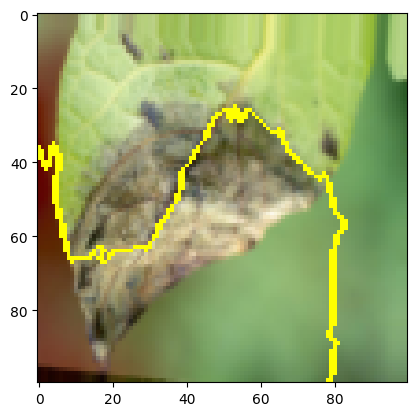

In [20]:
##lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
read_img=imread("late-blight_0_3853.jpeg")
read_img=resize(read_img,(100,100))

explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(
         read_img, 
         model169.predict
)
plt.imshow(read_img)
image, mask = explanation.get_image_and_mask(
         model169.predict(
              read_img.reshape(-1,100,100,3)
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
plt.imshow(mark_boundaries(image, mask))



In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

In [108]:
y_test1=np.array(y_test1,dtype="float32")
y_test1
predicted_stack=np.array(predicted_stack,dtype="float32")

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [111]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test.flatten(),predicted_knn.flatten())
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test.flatten(),predicted_rf.flatten())
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test.flatten(),predicted_xgb.flatten())
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test.flatten(),predicted_tree.flatten())
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test,mlp_model.predict(x_test))

16/16 [==============================] - 1s 25ms/step


ValueError: multilabel-indicator format is not supported

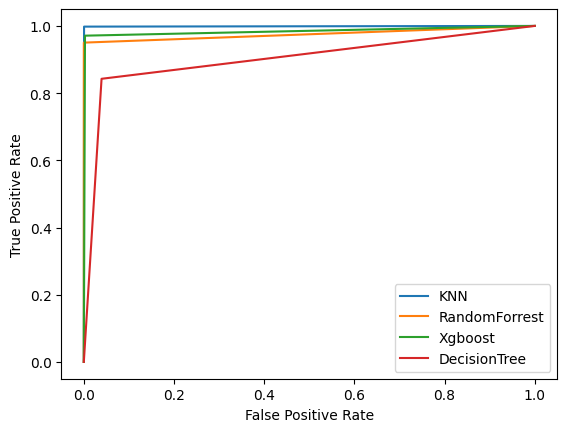

In [88]:
plt.plot(false_positive_rate1,true_positive_rate1, linestyle='-', label='KNN')
plt.plot(false_positive_rate2,true_positive_rate2, linestyle='-', label='RandomForrest')
plt.plot(false_positive_rate3,true_positive_rate3, linestyle='-', label='Xgboost')
plt.plot(false_positive_rate4,true_positive_rate4, linestyle='-', label='DecisionTree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Faster R-CNN

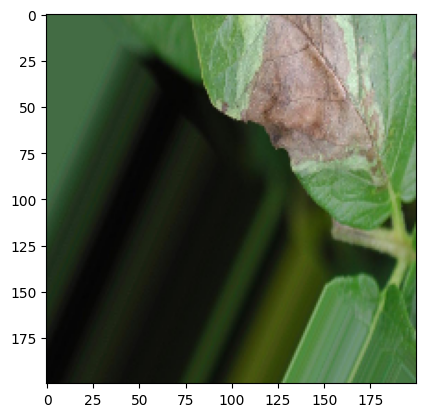

In [30]:
plt.imshow(extract[34][0])

124
148
160
129
162
131
133
162
134
130
167
136
133
172
147
131
171
148
129
165
137
163
161
130
164
129
134
168
130
162
128
173
131
124
166
128
158
125
163
124
161
165
163
136
175
144
136
172
146
138
171
150
138
171
150
131
165
142
137
171
147
146
181
156
146
181
161
143
172
152
139
174
146
155
126
169
128
126
162
126
131
165
132
147
182
152
147
181
154
154
184
158
154
184
158
144
174
148
152
180
158
148
180
156
143
177
152
148
180
159
132
164
143
127
159
138
127
160
139
141
173
152
134
163
143
125
162
130
132
167
134
155
185
161
149
177
154
151
178
159
146
173
158
150
174
152
129
160
129
159
136
169
140
127
167
132
144
178
143
142
169
134
148
176
139
140
166
139
166
190
166
149
173
151
150
173
154
144
166
153
138
162
141
145
170
141
179
198
172
158
176
150
160
177
151
162
178
154
167
182
159
166
180
157
168
191
163
160
181
149
172
189
157
176
191
163
173
192
169
172
194
165
177
189
165
160
175
151
156
172
150
161
177
150
158
179
147
158
184
148
143
171
133
145
172
132
130
158
140
165


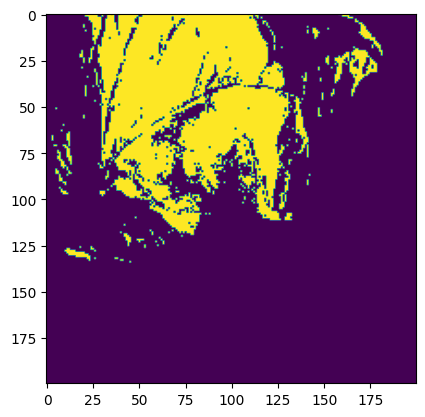

In [38]:
black=cv2.inRange(extract[4][0],np.array([124,124,124]),np.array([255,255,255]))
plt.imshow(black)
val=[]
for i in extract[4][0]:
    for j in i:
        for k in j:
            if k>=124 and k<=255:
                print(k)


In [39]:
print(print("hello"))

hello
None
